## Extracted frames from the video.

In [ ]:
import cv2
import os

# Function to extract frames
def extract_frames(video_path, output_folder):
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Open the video file
    video = cv2.VideoCapture(video_path)

    # Check if the video opened successfully
    if not video.isOpened():
        print(f"Error opening video file: {video_path}")
        return

    frame_count = 0
    while True:
        ret, frame = video.read()

        # If there are no more frames, break the loop
        if not ret:
            break

        # Save the frame as an image file
        frame_filename = os.path.join(output_folder, f"frame_{frame_count:04d}.jpg")
        cv2.imwrite(frame_filename, frame)

        frame_count += 1

    # Release the video capture object
    video.release()
    print(f"Extracted {frame_count} frames from the video.")

# Specify the path to the video file and the output folder
video_path = r'D:\Mines_Internship\Hand_Mask\marble_hand.mp4'
output_folder = r'D:\Mines_Internship\Hand_Mask\hand_mask'


static_path = r'D:\Mines_Internship\Hand_Mask\marble_without_hand.mp4'
output_static = r'D:\Mines_Internship\Hand_Mask\static_folder'

# Call the function to extract frames
extract_frames(static_path , output_static)

In [44]:
# Get a sorted list of image filenames
image_filenames = sorted([f for f in os.listdir(r"D:\Mines_Internship\Hand_Mask\images_marble") if f.endswith(".jpg") or f.endswith(".png")])
print(image_filenames)


['00000.jpg', '00007.jpg', '00014.jpg', '00019.jpg', '00021.jpg', '00026.jpg', '00031.jpg', '00036.jpg', '00043.jpg', '00049.jpg', '00055.jpg', '00056.jpg', '00062.jpg', '00063.jpg', '00077.jpg', '00078.jpg', '00084.jpg', '00091.jpg', '00099.jpg', '00102.jpg', '00103.jpg', '00110.jpg', '00117.jpg', '00118.jpg', '00124.jpg', '00125.jpg', '00131.jpg', '00132.jpg', '00139.jpg', '00146.jpg', '00147.jpg', '00153.jpg', '00160.jpg', '00168.jpg', '00175.jpg', '00181.jpg', '00182.jpg', '00196.jpg', '00197.jpg', '00201.jpg', '00202.jpg', '00217.jpg', '00223.jpg', '00224.jpg', '00230.jpg', '00231.jpg', '00238.jpg', '00239.jpg', '00245.jpg', '00246.jpg', '00252.jpg', '00267.jpg', '00268.jpg', '00274.jpg', '00280.jpg', '00281.jpg', '00289.jpg', '00295.jpg', '00296.jpg', '00301.jpg', '00309.jpg', '00316.jpg', '00322.jpg', '00323.jpg', '00330.jpg', '00337.jpg', '00338.jpg', '00344.jpg', '00345.jpg', '00351.jpg', '00352.jpg', '00359.jpg', '00366.jpg', '00367.jpg', '00373.jpg', '00380.jpg', '00388.jpg'

#### video from image 

In [6]:
import cv2
import os
import re

def natural_sort_key(s):
    """Helper function to sort strings containing numbers naturally."""
    return [int(text) if text.isdigit() else text.lower() for text in re.split('([0-9]+)', s)]

def create_video_from_images(folder_path, output_video_path, fps=30, image_extensions=(".png", ".jpg", ".jpeg")):

    # Get list of image files in the folder
    images = [img for img in os.listdir(folder_path) if img.lower().endswith(image_extensions)]
    images.sort(key=natural_sort_key)  # Sort images by natural order

    # Ensure there are images in the folder
    if not images:
        raise ValueError(f"No images found in folder {folder_path}")

    # Get the dimensions of the first image to set the video size
    first_image_path = os.path.join(folder_path, images[0])
    first_image = cv2.imread(first_image_path)
    if first_image is None:
        raise ValueError(f"Image at {first_image_path} could not be loaded")
    
    height, width, layers = first_image.shape
    size = (width, height)

    # Define the codec and create VideoWriter object for MP4
    out = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, size)

    # Write each image to the video
    for image_name in images:
        image_path = os.path.join(folder_path, image_name)
        image = cv2.imread(image_path)
        if image is None:
            print(f"Warning: Image {image_path} could not be loaded, skipping.")
            continue
        out.write(image)

    # Release everything if job is finished
    out.release()
    cv2.destroyAllWindows()
    print(f"Video saved as {output_video_path}")

# Example usage:
folder_path = r'D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\data\glass_experiment\images'  # Replace with your folder path containing images
output_video_path = r'D:\Mines_Internship\Hand_Mask\glass.mp4'  # Replace with desired output video path
create_video_from_images(folder_path, output_video_path, fps=30)


Video saved as D:\Mines_Internship\Hand_Mask\glass.mp4


In [1]:
import cv2
import os
import re

def natural_sort_key(s):
    """Helper function to sort strings containing numbers naturally."""
    return [int(text) if text.isdigit() else text.lower() for text in re.split('([0-9]+)', s)]

def create_video_from_images(folder_path, output_video_path, fps=30, image_extensions=(".png", ".jpg", ".jpeg")):
    """
    Creates a video from images in a specified folder.

    Parameters:
    - folder_path: str, path to the folder containing images.
    - output_video_path: str, path to save the output video.
    - fps: int, frames per second for the output video.
    - image_extensions: tuple, image file extensions to consider.
    """
    # Get list of image files in the folder
    images = [img for img in os.listdir(folder_path) if img.lower().endswith(image_extensions)]
    images.sort(key=natural_sort_key)  # Sort images by natural order

    # Ensure there are images in the folder
    if not images:
        raise ValueError(f"No images found in folder {folder_path}")

    # Get the dimensions of the first image to set the video size
    first_image_path = os.path.join(folder_path, images[0])
    first_image = cv2.imread(first_image_path)
    if first_image is None:
        raise ValueError(f"Image at {first_image_path} could not be loaded")
    
    height, width, layers = first_image.shape
    size = (width, height)

    # Define the codec and create VideoWriter object for MP4
    out = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, size)

    # Write each image to the video
    for image_name in images:
        image_path = os.path.join(folder_path, image_name)
        image = cv2.imread(image_path)
        if image is None:
            print(f"Warning: Image {image_path} could not be loaded, skipping.")
            continue
        out.write(image)

    # Release everything if job is finished
    out.release()
    cv2.destroyAllWindows()
    print(f"Video saved as {output_video_path}")


base_output_dir = r'D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\output\glass_v3\train_orignal\ours_40000'
static_output_dir = r'D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\output\glass_v3\train_static\ours_40000'
name = "glass"

gt_dir = f'{base_output_dir}\\gt'
rendering_dir = f'{base_output_dir}\\renders'
hands_dir =  f'{base_output_dir}\\segement'
static_dir = f'{static_output_dir}\\renders'

fix_dir = f'{base_output_dir}\\fix'
fix_static_dir = f'{static_output_dir}\\fix'
fix_hands_dir = f'{base_output_dir}\\fix_segement'
 


renderin_video_path = f'{base_output_dir}\\renders_{name}.mp4'
hands_video_path =  f'{base_output_dir}\\hands_{name}.mp4'
static_vide_path = f'{base_output_dir}\\static_{name}.mp4'
gt_video_path = f'{base_output_dir}\\gt_{name}.mp4'

fix_video_path = f'{base_output_dir}\\fix_{name}.mp4'
fix_static_video_path = f'{base_output_dir}\\fix_static_{name}.mp4'
fix_hands_video_path = f'{base_output_dir}\\fix_hands_{name}.mp4'

create_video_from_images(gt_dir, gt_video_path, fps=20)
create_video_from_images(rendering_dir, renderin_video_path, fps=20)
create_video_from_images(hands_dir, hands_video_path, fps=20)
create_video_from_images(static_dir, static_vide_path, fps=20)

create_video_from_images(fix_dir, fix_video_path, fps=20)
create_video_from_images(fix_static_dir, fix_static_video_path, fps=20)
create_video_from_images(fix_hands_dir, fix_hands_video_path, fps=20)

Video saved as D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\output\glass_v3\train_orignal\ours_40000\gt_glass.mp4
Video saved as D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\output\glass_v3\train_orignal\ours_40000\renders_glass.mp4
Video saved as D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\output\glass_v3\train_orignal\ours_40000\hands_glass.mp4
Video saved as D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\output\glass_v3\train_orignal\ours_40000\static_glass.mp4
Video saved as D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\output\glass_v3\train_orignal\ours_40000\fix_glass.mp4
Video saved as D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\output\glass_v3\train_orignal\ours_40000\fix_static_glass.mp4
Video saved as D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\output\glass_v3\train_orignal\ours_40000\fix_hands_glass.mp4


In [2]:
import cv2
import os
import numpy as np

def combine_videos(video_paths, output_path, fps=20):
    if not video_paths:
        print("No video paths provided.")
        return

    num_videos = len(video_paths)
    grid_size = (2, 4)  # 2 rows, 4 columns

    # Capture all videos to get properties
    caps = [cv2.VideoCapture(video_path) for video_path in video_paths]
    widths = [int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) for cap in caps]
    heights = [int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)) for cap in caps]

    # Determine the output frame size
    max_width = max(widths)
    max_height = max(heights)
    output_width = max_width * grid_size[1]
    output_height = max_height * grid_size[0]

    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (output_width, output_height))

    # Prepare black frame for empty slots
    black_frame = np.zeros((max_height, max_width, 3), dtype=np.uint8)

    while True:
        frames = []
        for cap in caps:
            ret, frame = cap.read()
            if not ret:
                frame = black_frame.copy()  # Use black frame if video ends
            frames.append(frame)

        # If all videos are done, break the loop
        if all((frame == black_frame).all() for frame in frames):
            break

        # Resize frames to have the same size
        resized_frames = [cv2.resize(frame, (max_width, max_height)) for frame in frames]

        # Add black frames to fill the grid if there are less than 8 videos
        while len(resized_frames) < grid_size[0] * grid_size[1]:
            resized_frames.append(black_frame.copy())

        # Create grid frame
        grid_frame = []
        for i in range(grid_size[0]):
            row_frames = resized_frames[i*grid_size[1]:(i+1)*grid_size[1]]
            grid_frame.append(cv2.hconcat(row_frames))
        combined_frame = cv2.vconcat(grid_frame)

        # Add labels to the frames
        label_font = cv2.FONT_HERSHEY_SIMPLEX
        label_scale = 1
        label_color = (255, 255, 255)  # White color
        label_thickness = 2

        labels = ['GT', 'Rendering', 'Static', 'Hands',
                  '', 'Fix', 'Static', 'Hands']

        positions = [(j * max_width + 10, i * max_height + 30) for i in range(grid_size[0]) for j in range(grid_size[1])]

        for position, label in zip(positions, labels):
            cv2.putText(combined_frame, label, position, label_font, label_scale, label_color, label_thickness)

        # Write the concatenated frame to the output video
        out.write(combined_frame)

    # Release everything when the job is finished
    for cap in caps:
        cap.release()
    out.release()
    print('Combined video with labels has been saved as', output_path)

# Define the base output directory and name for the videos
base_output_dir = r'D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\output\glass_v3\train_orignal\ours_40000'
name = "glass"

gt_video_path = os.path.join(base_output_dir, f'gt_{name}.mp4')
renderin_video_path = os.path.join(base_output_dir, f'renders_{name}.mp4')
static_video_path = os.path.join(base_output_dir, f'static_{name}.mp4')
hands_video_path = os.path.join(base_output_dir, f'hands_{name}.mp4')

fix_video_path = os.path.join(base_output_dir, f'fix_{name}.mp4')
fix_static_video_path = os.path.join(base_output_dir, f'fix_static_{name}.mp4')
fix_hands_video_path = os.path.join(base_output_dir, f'fix_hands_{name}.mp4')

# List of video paths
video_paths = [
    gt_video_path,
    renderin_video_path,
    static_video_path,
    hands_video_path,
    None,  # Placeholder for the empty slot
    fix_video_path,
    fix_static_video_path,
    fix_hands_video_path
]

# Output path for the concatenated video
output_path = os.path.join(base_output_dir, f'result_{name}.mp4')

combine_videos(video_paths, output_path)


Combined video with labels has been saved as D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\output\glass_v3\train_orignal\ours_40000\result_glass.mp4


## Resize video frame 

In [3]:
import cv2
import os
import numpy as np

def combine_videos(video_paths, output_path, fps=20, resize_width=None, resize_height=None):
    if not video_paths:
        print("No video paths provided.")
        return

    num_videos = len(video_paths)
    grid_size = (2, 4)  # 2 rows, 4 columns

    # Capture all videos to get properties
    caps = [cv2.VideoCapture(video_path) for video_path in video_paths]
    
    # Determine the frame size for resizing
    if resize_width is None or resize_height is None:
        widths = [int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) for cap in caps]
        heights = [int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)) for cap in caps]
        max_width = max(widths)
        max_height = max(heights)
    else:
        max_width = resize_width
        max_height = resize_height

    # Determine the output frame size
    output_width = max_width * grid_size[1]
    output_height = max_height * grid_size[0]

    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (output_width, output_height))

    # Prepare black frame for empty slots
    black_frame = np.zeros((max_height, max_width, 3), dtype=np.uint8)

    while True:
        frames = []
        for cap in caps:
            ret, frame = cap.read()
            if not ret:
                frame = black_frame.copy()  # Use black frame if video ends
            else:
                # Resize frame if resize dimensions are provided
                if resize_width is not None and resize_height is not None:
                    frame = cv2.resize(frame, (resize_width, resize_height))
            frames.append(frame)

        # If all videos are done, break the loop
        if all((frame == black_frame).all() for frame in frames):
            break

        # Add black frames to fill the grid if there are less than 8 videos
        while len(frames) < grid_size[0] * grid_size[1]:
            frames.append(black_frame.copy())

        # Create grid frame
        grid_frame = []
        for i in range(grid_size[0]):
            row_frames = frames[i * grid_size[1]:(i + 1) * grid_size[1]]
            grid_frame.append(cv2.hconcat(row_frames))
        combined_frame = cv2.vconcat(grid_frame)

        # Add labels to the frames
        label_font = cv2.FONT_HERSHEY_SIMPLEX
        label_scale = 1
        label_color = (255, 255, 255)  # White color
        label_thickness = 2

        labels = ['GT', 'Rendering', 'Static', 'Hands',
                  '', 'Fix', 'Static', 'Hands']

        positions = [(j * max_width + 10, i * max_height + 30) for i in range(grid_size[0]) for j in range(grid_size[1])]

        for position, label in zip(positions, labels):
            cv2.putText(combined_frame, label, position, label_font, label_scale, label_color, label_thickness)

        # Write the concatenated frame to the output video
        out.write(combined_frame)

    # Release everything when the job is finished
    for cap in caps:
        cap.release()
    out.release()
    print('Combined video with labels has been saved as', output_path)

# Define the base output directory and name for the videos
base_output_dir = r'D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\output\glass_v3\train_orignal\ours_40000'
name = "glass"

gt_video_path = os.path.join(base_output_dir, f'gt_{name}.mp4')
renderin_video_path = os.path.join(base_output_dir, f'renders_{name}.mp4')
static_video_path = os.path.join(base_output_dir, f'static_{name}.mp4')
hands_video_path = os.path.join(base_output_dir, f'hands_{name}.mp4')

fix_video_path = os.path.join(base_output_dir, f'fix_{name}.mp4')
fix_static_video_path = os.path.join(base_output_dir, f'fix_static_{name}.mp4')
fix_hands_video_path = os.path.join(base_output_dir, f'fix_hands_{name}.mp4')

# List of video paths
video_paths = [
    gt_video_path,
    renderin_video_path,
    static_video_path,
    hands_video_path,
    None,  # Placeholder for the empty slot
    fix_video_path,
    fix_static_video_path,
    fix_hands_video_path
]

# Output path for the concatenated video
output_path = os.path.join(base_output_dir, f'result_resize_{name}.mp4')

# Desired frame size for each video
resize_width = 285
resize_height = 133

combine_videos(video_paths, output_path, fps=20, resize_width=resize_width, resize_height=resize_height)



Combined video with labels has been saved as D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\output\glass_v3\train_orignal\ours_40000\result_resize_glass.mp4


## Hands Decomposation

In [53]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.morphology import remove_small_objects, binary_closing, disk
from skimage.transform import resize
from scipy.ndimage import binary_fill_holes
import cv2

base_output_dir = r'D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\output\leather_v1\train\ours_40000'

# Define the directories containing the images and masks
images_dir = f'{base_output_dir}\\renders'
masks_dir = f'{base_output_dir}\\renders_PCA'
output_dir = f'{base_output_dir}\\segement'

fix_image_dir = f'{base_output_dir}\\fix'
fix_masks_dir = f'{base_output_dir}\\fix_mask'
output_fix_dir = f'{base_output_dir}\\fix_segement'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)
os.makedirs(output_fix_dir, exist_ok=True)

# Function to segment hand from an image using the mask with adjustable threshold
def segment_hand_with_adjustable_threshold(image_path, mask_path, output_path, manual_thresh=None):
    # Open the mask and original images
    mask_image = Image.open(mask_path)
    original_image = Image.open(image_path)

    # Convert images to numpy arrays for further processing
    mask_np = np.array(mask_image)
    original_image_np = np.array(original_image)

    # Remove the alpha channel from mask if present
    if mask_np.shape[-1] == 4:
        mask_np = mask_np[:, :, :3]

    # Convert mask to grayscale
    mask_gray = rgb2gray(mask_np)

    # Apply Gaussian blur to the grayscale mask
    mask_blur = cv2.GaussianBlur(mask_gray, (5, 5), 0)

    # Apply Otsu's threshold to create a binary mask or use manual threshold if provided
    if manual_thresh is None:
        thresh = threshold_otsu(mask_blur)
    else:
        thresh = manual_thresh
    binary_mask = mask_blur > thresh

    # Fill the holes inside the binary mask to create a complete mask
    filled_mask = binary_fill_holes(binary_mask).astype(np.uint8)

    # Perform morphological operations to clean up the mask
    binary_mask_cleaned = binary_closing(filled_mask, disk(3))
    binary_mask_cleaned = remove_small_objects(binary_mask_cleaned, min_size=500)

    # Resize the binary mask to match the dimensions of the original image
    binary_mask_resized = resize(binary_mask_cleaned.astype(float), original_image_np.shape[:2], anti_aliasing=False)
    binary_mask_resized = binary_mask_resized > 0.5  # Convert to binary

    # Apply the resized binary mask to the original image to segment the hand
    segmented_image_resized = original_image_np.copy()
    segmented_image_resized[~binary_mask_resized] = 0  # Set background pixels to 0

    # Save the segmented image
    segmented_image = Image.fromarray(segmented_image_resized.astype(np.uint8))
    segmented_image.save(output_path)

# Example usage with manual threshold
# Change this value to fine-tune the threshold
manual_threshold = 0.1

# Process all images and masks
for filename in os.listdir(images_dir):
    if filename.endswith('.png') or filename.endswith('.jpg'):
        image_path = os.path.join(images_dir, filename)
        mask_path = os.path.join(masks_dir, filename)
        output_path = os.path.join(output_dir, filename)

        if os.path.exists(mask_path):
            segment_hand_with_adjustable_threshold(image_path, mask_path, output_path, manual_thresh=manual_threshold)
        else:
            print(f"Mask for {filename} not found.")

print("Processing complete.")

# Process all images and masks
for filename in os.listdir(fix_image_dir):
    if filename.endswith('.png') or filename.endswith('.jpg'):
        image_path = os.path.join(fix_image_dir, filename)
        mask_path = os.path.join(fix_masks_dir, filename)
        output_path = os.path.join(output_fix_dir, filename)

        if os.path.exists(mask_path):
            segment_hand_with_adjustable_threshold(image_path, mask_path, output_path, manual_thresh=manual_threshold)
        else:
            print(f"Mask for {filename} not found.")

print("Processing complete.")


Processing complete.
Processing complete.


In [7]:
import os
from PIL import Image
import numpy as np
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.morphology import remove_small_objects, binary_closing, disk
from skimage.transform import resize

# Define the directories containing the images and masks

images_dir = r'D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\output\glass_v2\train_all\ours_40000\renders'
masks_dir = r'D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\output\glass_v2\train_all\ours_40000\renders_PCA'
segmented_output_dir  = r"D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\output\glass_v2\train_all\ours_40000\segement"
outside_mask_output_dir = r'D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\output\glass_v2\train_all\ours_40000\rest_mask'

# Create the output directories if they don't exist
os.makedirs(segmented_output_dir, exist_ok=True)
os.makedirs(outside_mask_output_dir, exist_ok=True)

# Function to process and apply the mask to segment the hand from an image
def segment_hand(image_path, mask_path, segmented_output_path, outside_mask_output_path):
    # Open the mask and original images
    mask_image = Image.open(mask_path)
    original_image = Image.open(image_path)

    # Convert images to numpy arrays for further processing
    mask_np = np.array(mask_image)
    original_image_np = np.array(original_image)

    # Remove the alpha channel from mask if present
    if mask_np.shape[-1] == 4:
        mask_np = mask_np[:, :, :3]

    # Convert mask to grayscale
    mask_gray = rgb2gray(mask_np)

    # Apply Otsu's threshold to create a binary mask
    thresh = threshold_otsu(mask_gray)
    binary_mask = mask_gray > thresh

    # Perform morphological operations to clean up the mask
    binary_mask_cleaned = binary_closing(binary_mask, disk(3))
    binary_mask_cleaned = remove_small_objects(binary_mask_cleaned, min_size=500)

    # Resize the binary mask to match the dimensions of the original image
    binary_mask_resized = resize(binary_mask_cleaned.astype(float), original_image_np.shape[:2], anti_aliasing=False)
    binary_mask_resized = binary_mask_resized > 0.5  # Convert to binary

    # Create the segmented image by applying the mask
    segmented_image_resized = original_image_np.copy()
    segmented_image_resized[~binary_mask_resized] = 0  # Set background pixels to 0

    # Save the segmented image
    segmented_image = Image.fromarray(segmented_image_resized.astype(np.uint8))
    segmented_image.save(segmented_output_path)

    # Create the outside mask image by applying the inverse of the mask
    outside_mask_image_resized = original_image_np.copy()
    outside_mask_image_resized[binary_mask_resized] = 0  # Set hand pixels to 0

    # Save the outside mask image
    outside_mask_image = Image.fromarray(outside_mask_image_resized.astype(np.uint8))
    outside_mask_image.save(outside_mask_output_path)

# Process all images and masks
for filename in os.listdir(images_dir):
    if filename.endswith('.png') or filename.endswith('.jpg'):
        image_path = os.path.join(images_dir, filename)
        mask_path = os.path.join(masks_dir, filename)
        segmented_output_path = os.path.join(segmented_output_dir, filename)
        outside_mask_output_path = os.path.join(outside_mask_output_dir, filename)

        if os.path.exists(mask_path):
            segment_hand(image_path, mask_path, segmented_output_path, outside_mask_output_path)
        else:
            print(f"Mask for {filename} not found.")

print("Processing complete.")


Processing complete.


In [25]:
import os
import numpy as np
from PIL import Image
from skimage.transform import resize

# Define the directories containing the images and masks
predicted_masks_dir = r'D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\output\marble_ex_1\train\ours_40000\PCA_test'
ground_truth_masks_dir = r'D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\data\marble\mask_test'


# Function to compute IoU
def compute_iou(pred_mask, gt_mask):
    intersection = np.logical_and(pred_mask, gt_mask)
    union = np.logical_or(pred_mask, gt_mask)
    iou = np.sum(intersection) / np.sum(union)
    return iou

# Function to sort and load filenames in order
def sorted_file_list(directory, extension):
    return sorted([f for f in os.listdir(directory) if f.endswith(extension)])

# Function to process and compute IoU for each mask pair
def evaluate_masks(predicted_masks_dir, ground_truth_masks_dir):
    iou_scores = []
    
    # Get sorted lists of filenames for predicted masks and ground truth masks
    predicted_files = sorted_file_list(predicted_masks_dir, '.png')
    ground_truth_files = sorted_file_list(ground_truth_masks_dir, '.jpg')
    
    # Ensure both directories have the same number of files
    if len(predicted_files) != len(ground_truth_files):
        print("The number of files in the predicted masks directory and ground truth masks directory does not match.")
        return
    
    for pred_filename, gt_filename in zip(predicted_files, ground_truth_files):
        pred_mask_path = os.path.join(predicted_masks_dir, pred_filename)
        gt_mask_path = os.path.join(ground_truth_masks_dir, gt_filename)

        pred_mask_image = Image.open(pred_mask_path)
        gt_mask_image = Image.open(gt_mask_path)

        pred_mask_np = np.array(pred_mask_image.convert('L')) > 128  # Convert to binary mask
        gt_mask_np = np.array(gt_mask_image.convert('L')) > 128  # Convert to binary mask

        # Resize masks to the same shape if necessary
        if pred_mask_np.shape != gt_mask_np.shape:
            gt_mask_np = resize(gt_mask_np.astype(float), pred_mask_np.shape, anti_aliasing=False) > 0.5

        iou = compute_iou(pred_mask_np, gt_mask_np)
        iou_scores.append(iou)
        print(f"{pred_filename} - {gt_filename} - IoU: {iou:.4f}")

    mean_iou = np.mean(iou_scores)
    median_iou = np.median(iou_scores)
    print(f"Mean IoU: {mean_iou*100:.2f}%")
    print(f"Median IoU: {median_iou*100:.2f}%")

# Run the evaluation
evaluate_masks(predicted_masks_dir, ground_truth_masks_dir)




00000.png - 00000.jpg - IoU: 0.0042
00001.png - 00007.jpg - IoU: 0.0053
00002.png - 00014.jpg - IoU: 0.0056
00003.png - 00019.jpg - IoU: 0.0056
00004.png - 00021.jpg - IoU: 0.0080
00005.png - 00026.jpg - IoU: 0.0059
00006.png - 00031.jpg - IoU: 0.0000
00007.png - 00036.jpg - IoU: 0.0027
00008.png - 00043.jpg - IoU: 0.0000
00009.png - 00049.jpg - IoU: 0.0082
00010.png - 00055.jpg - IoU: 0.0000
00011.png - 00056.jpg - IoU: 0.0000
00012.png - 00062.jpg - IoU: 0.0022
00013.png - 00063.jpg - IoU: 0.0039
00014.png - 00077.jpg - IoU: 0.0141
00015.png - 00078.jpg - IoU: 0.0203
00016.png - 00084.jpg - IoU: 0.0197
00017.png - 00091.jpg - IoU: 0.0852
00018.png - 00099.jpg - IoU: 0.1231
00019.png - 00102.jpg - IoU: 0.1486
00020.png - 00103.jpg - IoU: 0.1481
00021.png - 00110.jpg - IoU: 0.1523
00022.png - 00117.jpg - IoU: 0.1435
00023.png - 00118.jpg - IoU: 0.1395
00024.png - 00124.jpg - IoU: 0.1555
00025.png - 00125.jpg - IoU: 0.1661
00026.png - 00131.jpg - IoU: 0.1717
00027.png - 00132.jpg - IoU:

In [10]:
import os
import numpy as np
from PIL import Image
from skimage.transform import resize

# Define the directories containing the images and masks
predicted_masks_dir = r'D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\output\marble_ex_1\train\ours_40000\renders_PCA'
ground_truth_masks_dir = r'D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\data\marble\masks'


# Function to compute IoU
def compute_iou(pred_mask, gt_mask):
    intersection = np.logical_and(pred_mask, gt_mask)
    union = np.logical_or(pred_mask, gt_mask)
    iou = np.sum(intersection) / np.sum(union)
    return iou

# Function to sort and load filenames in order
def sorted_file_list(directory, extension):
    return sorted([f for f in os.listdir(directory) if f.endswith(extension)])

# Function to process and compute IoU for each mask pair
def evaluate_masks(predicted_masks_dir, ground_truth_masks_dir):
    iou_scores = []
    
    # Get sorted lists of filenames for predicted masks and ground truth masks
    predicted_files = sorted_file_list(predicted_masks_dir, '.png')
    ground_truth_files = sorted_file_list(ground_truth_masks_dir, '.jpg')
    
    # Ensure both directories have the same number of files
    if len(predicted_files) != len(ground_truth_files):
        print("The number of files in the predicted masks directory and ground truth masks directory does not match.")
        return
    
    for pred_filename, gt_filename in zip(predicted_files, ground_truth_files):
        pred_mask_path = os.path.join(predicted_masks_dir, pred_filename)
        gt_mask_path = os.path.join(ground_truth_masks_dir, gt_filename)

        pred_mask_image = Image.open(pred_mask_path)
        gt_mask_image = Image.open(gt_mask_path)

        pred_mask_np = np.array(pred_mask_image.convert('L')) > 128  # Convert to binary mask
        gt_mask_np = np.array(gt_mask_image.convert('L')) > 128  # Convert to binary mask

        # Resize masks to the same shape if necessary
        if pred_mask_np.shape != gt_mask_np.shape:
            gt_mask_np = resize(gt_mask_np.astype(float), pred_mask_np.shape, anti_aliasing=False) > 0.5

        iou = compute_iou(pred_mask_np, gt_mask_np)
        iou_scores.append(iou)
        print(f"{pred_filename} - {gt_filename} - IoU: {iou:.4f}")

    # Filter out outlier IoU scores
    mean_iou = np.mean(iou_scores)
    std_iou = np.std(iou_scores)
    filtered_iou_scores = [iou for iou in iou_scores if abs(iou - mean_iou) <= 2 * std_iou]

    mean_filtered_iou = np.mean(filtered_iou_scores)
    median_filtered_iou = np.median(filtered_iou_scores)
    print(f"Mean IoU: {mean_filtered_iou*100:.2f}%")
    print(f"Median IoU: {median_filtered_iou*100:.2f}%")

# Run the evaluation
evaluate_masks(predicted_masks_dir, ground_truth_masks_dir) 


00000.png - 00000.jpg - IoU: 0.0042
00001.png - 00007.jpg - IoU: 0.0053
00002.png - 00014.jpg - IoU: 0.0056
00003.png - 00019.jpg - IoU: 0.0056
00004.png - 00021.jpg - IoU: 0.0080
00005.png - 00026.jpg - IoU: 0.0059
00006.png - 00031.jpg - IoU: 0.0000
00007.png - 00036.jpg - IoU: 0.0027
00008.png - 00043.jpg - IoU: 0.0000
00009.png - 00049.jpg - IoU: 0.0082
00010.png - 00055.jpg - IoU: 0.0000
00011.png - 00056.jpg - IoU: 0.0000
00012.png - 00062.jpg - IoU: 0.0022
00013.png - 00063.jpg - IoU: 0.0039
00014.png - 00077.jpg - IoU: 0.0141
00015.png - 00078.jpg - IoU: 0.0203
00016.png - 00084.jpg - IoU: 0.0197
00017.png - 00091.jpg - IoU: 0.0852
00018.png - 00099.jpg - IoU: 0.1231
00019.png - 00102.jpg - IoU: 0.1486
00020.png - 00103.jpg - IoU: 0.1481
00021.png - 00110.jpg - IoU: 0.1523
00022.png - 00117.jpg - IoU: 0.1435
00023.png - 00118.jpg - IoU: 0.1395
00024.png - 00124.jpg - IoU: 0.1555
00025.png - 00125.jpg - IoU: 0.1661
00026.png - 00131.jpg - IoU: 0.1717
00027.png - 00132.jpg - IoU:

#### Image from video and resize


In [6]:
import cv2
import os

# Function to extract and resize frames
def extract_and_resize_frames(video_path, output_folder, width, height):
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Open the video file
    video = cv2.VideoCapture(video_path)

    # Check if the video opened successfully
    if not video.isOpened():
        print(f"Error opening video file: {video_path}")
        return

    frame_count = 0
    while True:
        ret, frame = video.read()

        # If there are no more frames, break the loop
        if not ret:
            break

        # Resize the frame
        resized_frame = cv2.resize(frame, (width, height))

        # Save the resized frame as an image file with the frame index
        frame_filename = os.path.join(output_folder, f"{video.get(cv2.CAP_PROP_POS_FRAMES):06.0f}.jpg")
        cv2.imwrite(frame_filename, resized_frame)

        frame_count += 1

    # Release the video capture object
    video.release()
    print(f"Extracted and resized {frame_count} frames from the video.")

# Specify the path to the video file and the output folder
video_path = r'E:\3DGS\Dataset\Marble\marble_1min.mp4'
output_folder = r'D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\data\marble_experiment\orignial_image'

# Call the function to extract and resize frames
extract_and_resize_frames(video_path, output_folder, 228, 128)



Extracted and resized 1798 frames from the video.


##### select image one of 4

In [5]:
import os
import shutil

# Function to copy one out of every four images in a folder
def copy_images(input_folder, output_folder, image_step=4):
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Get a sorted list of image files in the input folder
    image_files = sorted(os.listdir(input_folder))

    for index, image_file in enumerate(image_files):
        # Process every image_step-th image
        if index % image_step == 0:
            source_path = os.path.join(input_folder, image_file)
            destination_path = os.path.join(output_folder, image_file)
            
            # Copy the image
            shutil.copy2(source_path, destination_path)

    print(f"Copied every {image_step}-th image from {input_folder} to {output_folder}.")

# Specify the paths to the input folder and the output folder
input_folder = r'E:\3DGS\Dataset\leather\section_2_image'  # Provide the actual path to your images
output_folder = r'E:\3DGS\Dataset\leather\selected_images'  # Output folder for copied images

# Call the function to copy images
copy_images(input_folder, output_folder, image_step=4)


Copied every 4-th image from E:\3DGS\Dataset\leather\section_2_image to E:\3DGS\Dataset\leather\selected_images.


### Select Fix image from folder 

In [5]:
import os
import shutil
import math
from tqdm import tqdm

def copy_images(input_folder, output_folder, num_images=700):
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Get a sorted list of image files in the input folder
    image_files = sorted(os.listdir(input_folder))
    
    total_images = len(image_files)
    
    # Calculate the step needed to get approximately 600 images
    step = math.ceil(total_images / num_images)
    
    # Adjust the step if it results in selecting too many images
    while (total_images // step) > num_images:
        step += 1

    selected_count = 0

    with tqdm(total=num_images, desc="Copying images") as pbar:
        for index, image_file in enumerate(image_files):
            # Select images based on the calculated step
            if index % step == 0:
                source_path = os.path.join(input_folder, image_file)
                destination_path = os.path.join(output_folder, image_file)
                
                # Copy the image
                shutil.copy2(source_path, destination_path)
                selected_count += 1
                pbar.update(1)

                # Stop if we have copied the required number of images
                if selected_count >= num_images:
                    break

    print(f"Copied {selected_count} images from {input_folder} to {output_folder}.")

# Specify the paths to the input folder and the output folder
input_folder = r'D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\data\glass_experiment\orignial_image'  # Provide the actual path to your images
output_folder = r'D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\data\glass_experiment\input'  # Output folder for copied images

# Call the function to copy images
copy_images(input_folder, output_folder, num_images=600)


Copying images:  94%|█████████▎| 562/600 [00:01<00:00, 323.43it/s]

Copied 562 images from D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\data\glass_experiment\orignial_image to D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\data\glass_experiment\input.


In [8]:
import cv2
import os
import re
import shutil

def natural_sort_key(s):
    """Helper function to sort strings containing numbers naturally."""
    return [int(text) if text.isdigit() else text.lower() for text in re.split('([0-9]+)', s)]

def copy_images_based_on_first_folder(folder_path1, folder_path2, new_folder, image_extensions=(".png", ".jpg", ".jpeg")):
    # Create the new folder if it doesn't exist
    os.makedirs(new_folder, exist_ok=True)

    # Get list of image files in the first folder
    images1 = [img for img in os.listdir(folder_path1) if img.lower().endswith(image_extensions)]
    images1_set = set(images1)  # Convert to set for quick lookup

    # Get list of image files in the second folder
    images2 = [img for img in os.listdir(folder_path2) if img.lower().endswith(image_extensions)]

    # Copy images from the second folder to the new folder if they exist in the first folder
    for image_name2 in images2:
        if image_name2 in images1_set:
            src_path2 = os.path.join(folder_path2, image_name2)
            dst_path2 = os.path.join(new_folder, image_name2)
            shutil.copy(src_path2, dst_path2)

    print(f"Images from {folder_path2} that match the names in {folder_path1} copied to {new_folder}")


def create_video_from_images(folder_path, output_video_path, fps=30, image_extensions=(".png", ".jpg", ".jpeg")):
    # Get list of image files in the folder
    images = [img for img in os.listdir(folder_path) if img.lower().endswith(image_extensions)]
    images.sort(key=natural_sort_key)  # Sort images by natural order

    # Ensure there are images in the folder
    if not images:
        raise ValueError(f"No images found in folder {folder_path}")

    # Get the dimensions of the first image to set the video size
    first_image_path = os.path.join(folder_path, images[0])
    first_image = cv2.imread(first_image_path)
    if first_image is None:
        raise ValueError(f"Image at {first_image_path} could not be loaded")
    
    height, width, layers = first_image.shape
    size = (width, height)

    # Define the codec and create VideoWriter object for MP4
    out = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, size)

    # Write each image to the video
    for image_name in images:
        image_path = os.path.join(folder_path, image_name)
        image = cv2.imread(image_path)
        if image is None:
            print(f"Warning: Image {image_path} could not be loaded, skipping.")
            continue
        out.write(image)

    # Release everything if job is finished
    out.release()
    cv2.destroyAllWindows()
    print(f"Video saved as {output_video_path}")

# Example usage:
folder_path1 = r'D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\output\glass_v2\train_all\ours_40000\video_rendering'
folder_path2 = r'D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\output\glass_v2\train_all\ours_40000\fix'
new_folder = r'D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\output\glass_v2\train_all\selected_images'
output_video_path = r'D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\output\glass_v2\train_all\ours_40000\rendering.mp4'
output_gt_video_path = r'D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\output\glass_v2\train_all\ours_40000\gt_rendering.mp4'
output_fix = r'D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\output\glass_v2\train_all\ours_40000\fix'
# Copy selected images to the new folder
copy_images_based_on_first_folder(folder_path1, folder_path2, new_folder)

# # Create video from the new folder images
# create_video_from_images(new_folder, output_video_path, fps=15)
create_video_from_images(output_fix, output_gt_video_path, fps=30)

Images from D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\output\glass_v2\train_all\ours_40000\fix that match the names in D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\output\glass_v2\train_all\ours_40000\video_rendering copied to D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\output\glass_v2\train_all\selected_images
Video saved as D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\output\glass_v2\train_all\ours_40000\gt_rendering.mp4


(136, 303)
(136, 303, 3)
[[-0.64509804 -0.63259804 -0.62843137 ... -0.31053922 -0.29411765
  -0.35245098]
 [-0.61176471 -0.59509804 -0.59485294 ... -0.32720588 -0.29828431
  -0.28995098]
 [-0.55343137 -0.52818627 -0.51985294 ... -0.33553922 -0.33161765
  -0.32769608]
 ...
 [-0.21323529 -0.2129902  -0.20465686 ...  0.07254902  0.04338235
   0.03063725]
 [-0.20906863 -0.20882353 -0.20441176 ...  0.08063725  0.04730392
   0.04289216]
 [-0.20098039 -0.20465686 -0.2002451  ...  0.08431373  0.04681373
   0.04289216]]


C:\Users\jeffr\AppData\Local\Temp\ipykernel_31100\1545344590.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  ground_truth = imageio.imread(ground_truth_path)
C:\Users\jeffr\AppData\Local\Temp\ipykernel_31100\1545344590.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  rendering_output = imageio.imread(rendering_output_path)


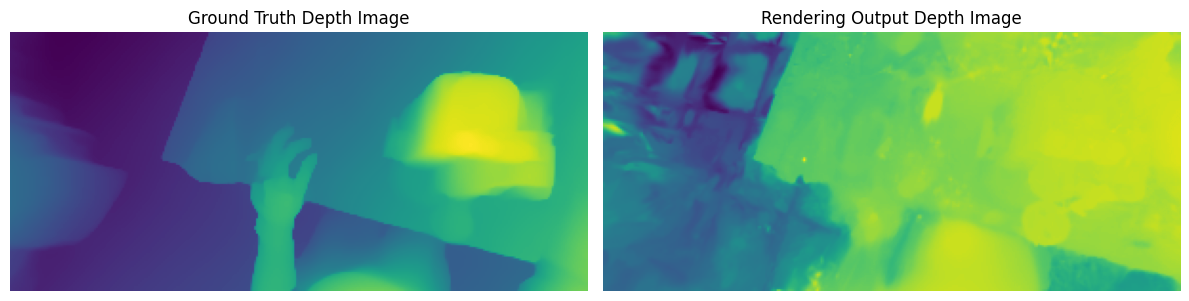

In [18]:
import matplotlib.pyplot as plt
import imageio
import numpy as np

# Replace these with your actual image file paths
ground_truth_path = r'D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\data\leather\depth_gy\000205_depth.png'
rendering_output_path = r'D:\Mines_Internship\DGD-Dynamic-3D-Gaussians-Distillation\output\leather_v1\train\ours_40000\depth\00013.png'

# Read the images
ground_truth = imageio.imread(ground_truth_path)
rendering_output = imageio.imread(rendering_output_path)

# Normalize the ground truth depth image
gt_depth_normalized = (ground_truth - ground_truth.min()) / (ground_truth.max() - ground_truth.min())

# Normalize the rendering output depth image
depth_normalized = (rendering_output[:,:,0] - rendering_output[:,:,0].min()) / (rendering_output[:,:,0].max() - rendering_output[:,:,0].min())



print(ground_truth.shape)
print(rendering_output.shape)
print(gt_depth_normalized - depth_normalized)

# Plotting the images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot ground truth
axes[0].imshow(gt_depth_normalized, cmap='viridis')
axes[0].set_title('Ground Truth Depth Image')
axes[0].axis('off')

# Plot rendering output
axes[1].imshow(depth_normalized, cmap='viridis')
axes[1].set_title('Rendering Output Depth Image')
axes[1].axis('off')

# Show the plot
plt.tight_layout()
plt.show()
